In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns; sns.set()

from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings("ignore")

In [2]:
customers_df = pd.read_csv('data/Mall_Customers.csv',header=0,
                           names=['ClienteID','Gênero','Idade','Renda anual (k $)','Pontuação de gastos (1-100)'])
print(customers_df.shape)
customers_df.head()

(200, 5)


,ClienteID,Gênero,Idade,Renda anual (k $),Pontuação de gastos (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
cols = customers_df.columns
cols

Index(['ClienteID', 'Gênero', 'Idade', 'Renda anual (k $)',
       'Pontuação de gastos (1-100)'],
      dtype='object')

In [4]:
# Remover coluna 
del customers_df['ClienteID']

In [5]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Gênero                       200 non-null    object
 1   Idade                        200 non-null    int64 
 2   Renda anual (k $)            200 non-null    int64 
 3   Pontuação de gastos (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


In [6]:
customers_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Idade,200.0,38.85,13.969007,18.0,28.75,36.0,49.0,70.0
Renda anual (k $),200.0,60.56,26.264721,15.0,41.50,61.5,78.0,137.0
Pontuação de gastos (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.0,99.0


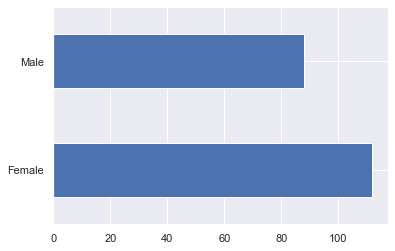

In [7]:
custo_genero = customers_df['Gênero'].value_counts()
custo_genero.plot(kind='barh')
plt.show()

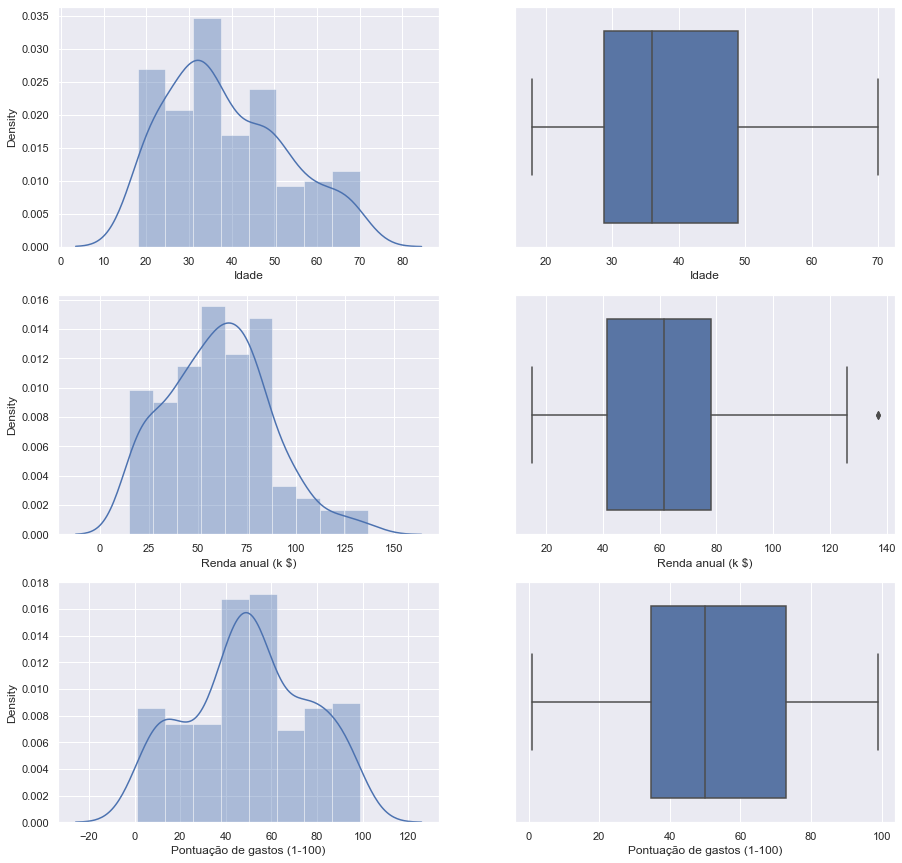

In [9]:
num_cols = ['Idade', 'Renda anual (k $)','Pontuação de gastos (1-100)']
n_rows = len(num_cols)

i = 1
plt.figure(figsize=(15,15))
for col in num_cols:
    plt.subplot(n_rows,2,i)
    sns.distplot(customers_df[col])

    plt.subplot(n_rows,2,i+1)
    sns.boxplot(customers_df[col])
    i = i+2
plt.show()

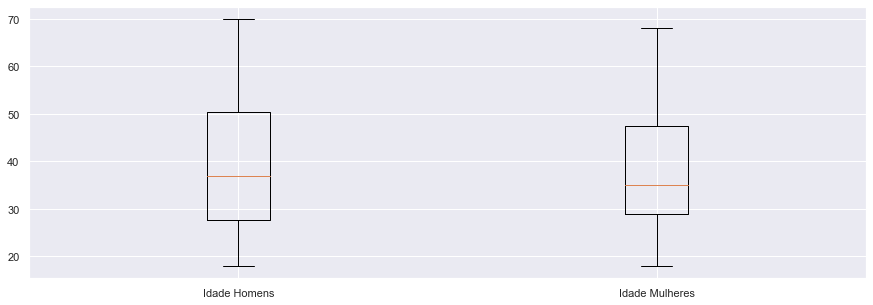

In [10]:
plt.figure(figsize=(15,5))
age_by_Male = customers_df[customers_df['Gênero'] == 'Male']['Idade']
age_by_Female = customers_df[customers_df['Gênero'] == 'Female']['Idade']

dist = [age_by_Male, age_by_Female]
plt.boxplot(dist)
plt.xticks([1,2],['Idade Homens', 'Idade Mulheres'])
plt.show()

In [11]:
cols

Index(['ClienteID', 'Gênero', 'Idade', 'Renda anual (k $)',
       'Pontuação de gastos (1-100)'],
      dtype='object')

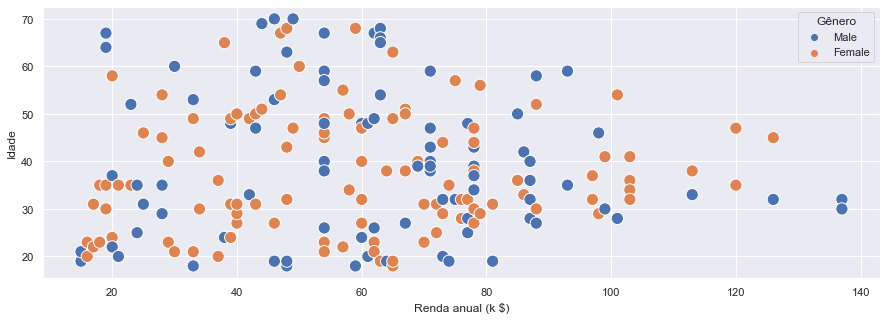

In [12]:
#sns.scatterplot(data=tips, x="total_bill", y="tip", hue="time")

plt.figure(figsize=(15,5))
sns.scatterplot(data=customers_df, x='Renda anual (k $)',
                y='Idade',  hue="Gênero",s=150,cmap='viridis')
plt.show()

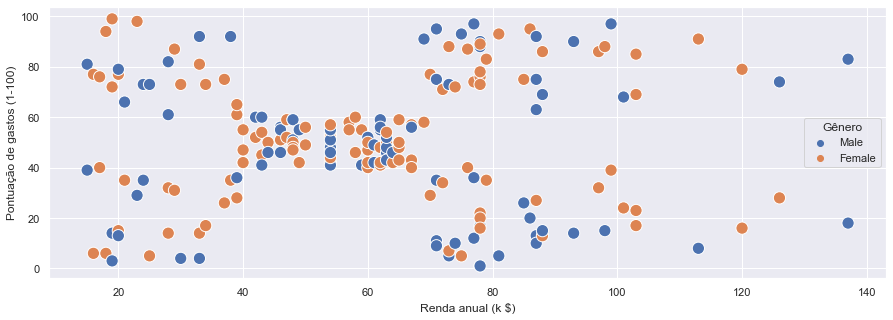

In [13]:
plt.figure(figsize=(15,5))
sns.scatterplot(data=customers_df, x='Renda anual (k $)',
                y='Pontuação de gastos (1-100)', 
                hue="Gênero",s=150,cmap='viridis')
plt.show()

In [14]:
X =customers_df[['Renda anual (k $)','Pontuação de gastos (1-100)']].values

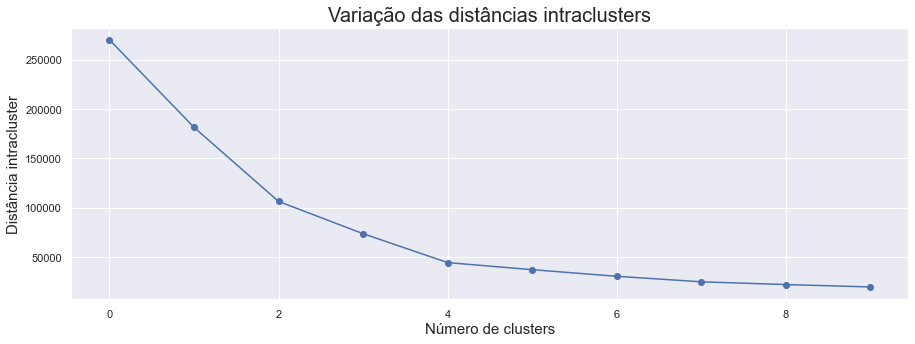

In [15]:
funcao_objetivo = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X)
    funcao_objetivo.append(kmeans.inertia_)
    
plt.figure(figsize=(15,5))    
plt.plot(funcao_objetivo,'-o')
plt.title('Variação das distâncias intraclusters',size=20)
plt.ylabel('Distância intracluster',size=15)
plt.xlabel('Número de clusters',size=15)
plt.show()

In [16]:
#k=5
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

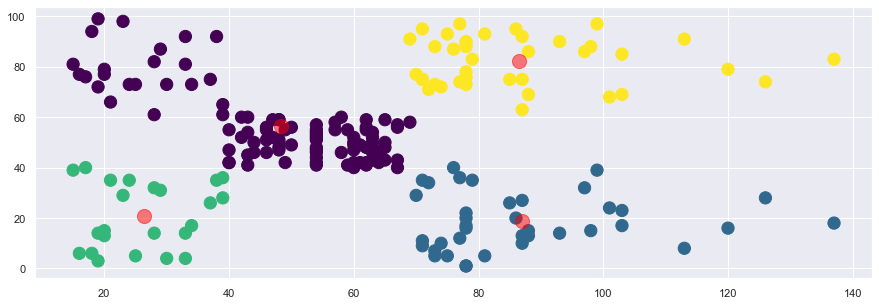

In [17]:
plt.figure(figsize=(15,5))
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=150, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5);
plt.show()

In [18]:
customers_df['Grupos'] = y_kmeans

In [19]:
customers_df.head()

,Gênero,Idade,Renda anual (k $),Pontuação de gastos (1-100),Grupos
0,Male,19,15,39,2
1,Male,21,15,81,0
2,Female,20,16,6,2
3,Female,23,16,77,0
4,Female,31,17,40,2
